<a href="https://colab.research.google.com/github/mjmousavi97/Deep-Learning-Tehran-uni/blob/main/HomeWorks/02%20HW/advanced_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libraries

In [4]:
import torch  # Core PyTorch library for tensors and GPU computations
from torch import nn  # Module for building neural network layers
import torch.nn.functional as F  # Functional API for layers and activations (stateless functions)
from torch.utils.data import DataLoader, Dataset  # Tools for batching, shuffling, and creating custom datasets

import torchvision  # PyTorch package for computer vision datasets, models, and transforms
from torchvision import transforms  # Image preprocessing and transformations (resize, normalize, etc.)
from torchvision.datasets import ImageFolder  # Loads images from folders organized by class labels

import matplotlib.pyplot as plt  # Plotting graphs and displaying images
import numpy as np  # Numerical computations and array operations
import seaborn as sns  # Statistical data visualization
import os  # File and directory operations
import glob  # File path pattern matching (wildcards)
import cv2  # OpenCV for image processing (reading, editing, filtering, etc.)
from tqdm import tqdm  # Progress bar for loops
from PIL import Image  # Pillow library for opening, saving, and manipulating images


#### Mounting Google Drive

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Dataset

In [6]:
DIR_TRAIN = "/content/drive/MyDrive/fashionmnist/train/"
DIR_TEST = "/content/drive/MyDrive/fashionmnist/test/"

In [16]:
classes = os.listdir(DIR_TRAIN)
print(f"Names of classes are: {classes}.\nThere are {len(classes)} classes.")

Names of classes are: ['Dress', 'Pullover', 'Sandal', 'Shirt', 'Sneaker', 'T-shirt', 'Trouser', 'Angle boot', 'Bag', 'Coat'].
There are 10 classes.


In [19]:
train_images = []
test_images = []

for _class in classes:
    train_images += glob.glob(DIR_TRAIN + _class + '/*.jpg')
    test_images += glob.glob(DIR_TEST + _class + '/*.jpg')

print("Total train images:", len(train_images))
print("Total test images:", len(test_images))

Total train images: 60000
Total test images: 10000


In [20]:
Transforms = transforms.Compose([transforms.ToTensor(),
                                 transforms.Normalize(mean=0.5, std=0.5)])

In [21]:
train_dataset = torchvision.datasets.FashionMNIST(
    root = "data", # where to download data to
    train = True, # get training data
    download = True, # download data if it doesn't exist on disk
    transform = Transforms # images come as PIL format, we want to apply transform on them
)

test_dataset = torchvision.datasets.FashionMNIST(
    root = "data",
    train = False, # get test data
    download = True,
    transform = Transforms
)

100%|██████████| 26.4M/26.4M [00:01<00:00, 16.2MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 274kB/s]
100%|██████████| 4.42M/4.42M [00:00<00:00, 4.46MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 11.9MB/s]


## Creating Dataloader

In [23]:
train_loader = DataLoader(
    dataset=train_dataset,
    batch_size=32,
    num_workers=2,
    shuffle=True
)

test_loader = DataLoader(
    dataset=test_dataset,
    batch_size=32,
    num_workers=2
)

In [24]:
train_sample_batch, train_label_batch = next(iter(train_loader))

In [28]:
print(train_sample_batch.shape, '\n')
print(train_label_batch.shape)

torch.Size([32, 1, 28, 28]) 

torch.Size([32])


Text(0.5, 1.0, 'A sample image of train data with label=Dress')

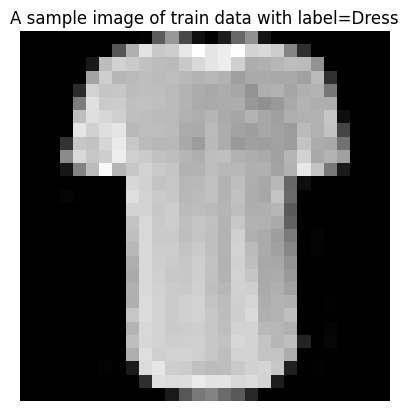

In [30]:
sample_image = train_sample_batch[0].permute(1, 2, 0)
label_of_sample_image = train_label_batch[0]

mean, std = 0.5, 0.5
sample_image = std * (sample_image + mean)

plt.imshow(sample_image, cmap='grey')
plt.axis('off')
plt.title(f'A sample image of train data with label={classes[label_of_sample_image]}')

